# 准备数据

## 获得训练数据，测试数据

In [1]:
import codecs
import numpy as np
import pandas as pd

In [2]:
# 导入训练数据
train_file = "./data/train.data"
train_df = pd.read_csv(train_file, sep="\t", header=None, names=["sentence", "category"])
test_file = "./data/test.data"
test_df = pd.read_csv(test_file, sep="\t", header=None, names=["sentence"])
print("训练集：{}；测试集：{}".format(len(train_df), len(test_df)))
print("训练集数据示例：")
train_df.head(5)

训练集：8000；测试集：2000
训练集数据示例：


,sentence,category
0,(2)若伴便秘者符合罗马Ⅳ功能性便秘诊断标准，若伴夜尿症者符合夜尿症的诊断标准；,Diagnostic
1,（1）患者拟行急症手术；,Therapy or Surgery
2,c) 在过去6个月内参加过I、II期临床试验或者3个月内参加过III、IV期临床试验；,Enrollment in other studies
3,4. 身高體重指數(BMI)&gt;=25得病人,Risk Assessment
4,5.愿意参与该研究并配合调查者；,Consent


In [3]:
print("测试集数据示例：")
test_df.head(5)

测试集数据示例：


,sentence
0,1.符合脓毒症诊断Sepsis 3.0版标准；
1,1）符合WHO对不孕症的诊断标准；
2,3. 肿瘤直径 ≥8mm且≤30mm;
3,8.合并其他运动可能加重的神经、肌肉、骨骼肌、风湿性疾病；
4,2. 符合国际疾病分类（ICD-10）编码 J21 的毛细支气管炎诊断标准。


In [4]:
# 查看训练集类别，及其数目
train_df.groupby(['category'],  as_index=False)['category'].agg({'count': 'count'})

,category,count
0,Addictive Behavior,196
1,Age,638
2,Allergy Intolerance,430
3,Compliance with Protocol,294
4,Consent,874
5,Diagnostic,794
6,Disease,1177
7,Enrollment in other studies,358
8,Laboratory Examinations,755
9,Life Expectancy,101


## 数据格式转化

### 通过TF-IDF算法将文本转换为词向量

In [5]:
# 将raw_text的文本转换为向量
def tfidf(raw_text):
    #将中文文本分词，并以空格隔开，形如英文句子
    import jieba
    preprocess_setences = []
    sentences =raw_text
    for sentence in sentences:
        words = [word for word in jieba.cut(sentence)]
        preprocess_setences.append(' '.join(words))

    # 使用sklearn自带的CoutVectorizer模块即可简单生成特征向量
    from sklearn.externals import joblib
    from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
    counter = CountVectorizer(max_features=1000)  # 词向量的维度设定为1000，可根据情况设定，少则文本信息不足，多则增加训练时间

    counts = counter.fit_transform(preprocess_setences)
    print('countvectorizer词表:\n',counter.vocabulary_)  #countvectorizer的词汇表，有多少个，词向量就是多少维度
    with open("count_voca", "w") as f:  # 将词汇表输出到文件
        for word, freq in counter.vocabulary_.items():
            f.write("{}\t{}\n".format(word, freq))
#     print('词向量矩阵:\n',counts.toarray())  #fit_transform后查看具体向量
    tfidfer = TfidfTransformer()
    tfidf = tfidfer.fit_transform(counts)
    print('tfidf向量矩阵：\n',tfidf.toarray())  #fit_transform后查看具体向量矩阵
    joblib.dump(counter, 'count_vect') #保存矢量化
    return list(tfidf.toarray())
train_text = list(train_df['sentence'])
result = tfidf(train_text)
data_X = [np.array(i) for i in result]

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\310272~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.334 seconds.
Prefix dict has been built succesfully.


countvectorizer词表:
 {'符合': 708, '诊断': 876, '标准': 565, '患者': 459, '拟行': 499, '手术': 483, '过去': 901, '参加': 292, 'ii': 83, '临床试验': 156, '或者': 476, 'iii': 84, 'iv': 86, '身高': 892, 'bmi': 54, 'gt': 73, '25': 24, '病人': 654, '愿意': 468, '参与': 291, '研究': 689, '配合': 931, '合并': 315, '严重': 142, '肝肾': 771, '功能': 266, '全者': 223, '筛选': 712, '访视': 869, '血清': 844, 'hbv': 77, 'dna': 65, 'ml': 95, '家属': 384, '知情': 688, '同意': 316, '签署': 714, '同意书': 317, '17': 13, '血红蛋白': 849, '低于': 190, '90g': 48, '年龄': 413, '50': 35, '80': 45, '五年': 169, '内有': 234, '药物滥用': 832, '史者': 311, '急性': 452, '依从性': 204, '遵从': 925, '治疗': 595, '大于': 360, '45': 33, '不能': 133, '除外': 960, '动脉瘤': 271, '急诊': 453, '接受': 513, '长期': 946, '激素': 618, '明确': 539, '18': 14, '受试者': 305, '自愿': 820, '本次': 559, '常规': 407, '无效': 534, '10': 0, '切除': 255, '试验': 878, '开始': 419, '30': 27, '天内': 361, '酗酒': 934, '存在': 371, '酒精': 932, '药物': 831, '依赖': 206, '同时': 318, '其他': 229, '恶性肿瘤': 456, '疾病': 652, '年内': 412, '正在': 578, '使用': 201, '类似': 715, '产品': 171, '

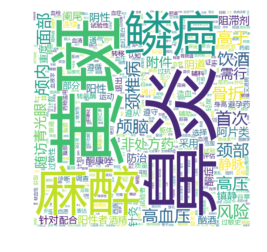

In [7]:
# 词云显示所选的组成词向量的词
import matplotlib.pyplot as plt
from wordcloud import WordCloud
cloud_words = []
with open("count_voca", "r") as f:
    for line in f:
        line = f.readline()
        l = line.strip().split("\t")
        cloud_words.extend([l[0]] * int(l[1]))
wordcloud_ = WordCloud(background_color="white", collocations=False, max_words=1000, width=500, height=500, font_path="C:\\Windows\\Fonts\\msyh.ttc").generate(" ".join(cloud_words))

plt.imshow(wordcloud_, interpolation='bilinear')
plt.axis("off")
plt.show()


### 将文本类别(15个)转换为数字(0-14)表示

In [8]:
# 将raw_category的15个类别转换为0-14的数字
raw_category = list(train_df['category'])
category_ = sorted(list(set(list(train_df['category']))))
category_index = {}
for i in category_:
    category_index[i] = category_.index(i)
    print(i, category_.index(i))
data_Y = np.array([category_index[c] for c in raw_category])

Addictive Behavior 0
Age 1
Allergy Intolerance 2
Compliance with Protocol 3
Consent 4
Diagnostic 5
Disease 6
Enrollment in other studies 7
Laboratory Examinations 8
Life Expectancy 9
Organ or Tissue Status 10
Pharmaceutical Substance or Drug 11
Risk Assessment 12
Smoking Status 13
Therapy or Surgery 14


### 查看转换后的训练数据的输入与输出格式

In [11]:
print(data_X[:1])
print(data_Y)

[array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.    

## 训练神经网络

### 将数据分隔为训练集&验证集

In [12]:
# 按照3:1的比例
from sklearn.model_selection import train_test_split
X_train,X_validation,y_train,y_validation= train_test_split(data_X, data_Y, test_size=0.25, random_state=0)
train_data = [X_train, y_train]
validation_data = [X_validation, y_validation]
print(len(X_train), len(y_train), len(X_validation), len(y_validation))

6000 6000 2000 2000


### 转换为神经网络输入层格式

In [13]:
def vectorized_result(j):
    e = np.zeros((15, 1))
    e[j] = 1.0
    return e

training_inputs = [np.reshape(x, (1000, 1)) for x in train_data[0]]  #训练输入为1000 X 1的矩阵
training_results = [vectorized_result(y) for y in train_data[1]] #训练输出为15 X 1的矩阵
training_data = zip(training_inputs, training_results)

validation_inputs = [np.reshape(x, (1000, 1)) for x in validation_data[0]]
validation_data = zip(validation_inputs, validation_data[1])

### 导入神经网络，并进行训练

In [14]:
# 导入网络模块
from network import Network
# 设置网络结构，如下所示三层神经网络。第一层为输入层(1000个神经元)，第二层为隐藏层(30个神经元)，第三层为输出层(15个神经元)。
net = Network([1000, 30, 15]) 
# 设置超参数, 分别为。
# epoch为迭代期数量：设置为30，
# mini_batch_size为采样时的小批量数据的大小，设置为10，
# eta为学习速率，设置为3.0
net.SGD(training_data, 30, 10, 3, test_data=validation_data)

Epoch 0: 986 / 2000
Epoch 1: 1198 / 2000
Epoch 2: 1326 / 2000
Epoch 3: 1435 / 2000
Epoch 4: 1525 / 2000
Epoch 5: 1604 / 2000
Epoch 6: 1643 / 2000
Epoch 7: 1659 / 2000
Epoch 8: 1683 / 2000
Epoch 9: 1696 / 2000
Epoch 10: 1703 / 2000
Epoch 11: 1720 / 2000
Epoch 12: 1715 / 2000
Epoch 13: 1718 / 2000
Epoch 14: 1723 / 2000
Epoch 15: 1717 / 2000
Epoch 16: 1721 / 2000
Epoch 17: 1729 / 2000
Epoch 18: 1738 / 2000
Epoch 19: 1735 / 2000
Epoch 20: 1741 / 2000
Epoch 21: 1731 / 2000
Epoch 22: 1728 / 2000
Epoch 23: 1743 / 2000
Epoch 24: 1730 / 2000
Epoch 25: 1749 / 2000
Epoch 26: 1734 / 2000
Epoch 27: 1742 / 2000
Epoch 28: 1743 / 2000
Epoch 29: 1742 / 2000


## 如何预测新输入？

In [15]:
import jieba
from sklearn.externals import joblib
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
def predict(sentence):
    # 利用之前的词汇构建特征向量
    words = [word for word in jieba.cut(sentence)]
    preprocess_s = ' '.join(words)

    # 导入tf-idf词表
    count_vect = joblib.load('count_vect')
    tfidfer = TfidfTransformer()
    X_new_counts = count_vect.transform([preprocess_s])
    tfidf = tfidfer.fit_transform(X_new_counts)
    criteria_X = tfidf.toarray()

    # 使用之前训练的参数，进行预测
    predict_inputs = np.reshape(criteria_X, (1000, 1))  #训练输入为1000 X 1的矩阵
    predict_results = np.argmax(net.feedforward(predict_inputs))
    return category_[predict_results]

In [34]:
# 输入一条新句子
s = "3.有糖尿病的患者。"
# s = "1.术后发生非计划再次手术；"
c = predict(s)
print(c)

Disease


In [33]:
# 预测测试集数据的结果，并保存为文件test.predict
import codecs
test_sentences = list(test_df["sentence"])
n = 0
with codecs.open("./data/test.predict", "w", encoding="utf-8") as f:
    for s in test_sentences:
        c = predict(s) # 预测
        f.write("{}\t{}\n".format(s,c)) # 保存
        # 显示进度
        n += 1
        if n%10 ==0: print("[INFO] Processing: {0}/{1} \t {2:<50s} {3:10s}".format(str(n), str(len(test_sentences)), c, s))

[INFO] Processing: 10/2000 	 Consent                                            3.受试者同意参加本试验，并签署知情同意书。
[INFO] Processing: 20/2000 	 Consent                                            1.了解试验全过程，自愿参加并签署知情同意书；
[INFO] Processing: 30/2000 	 Therapy or Surgery                                 4.近期手术史   
[INFO] Processing: 40/2000 	 Diagnostic                                         1）符合MCI诊断标准
[INFO] Processing: 50/2000 	 Disease                                            （8）病情未得到控制的高血压患者；
[INFO] Processing: 60/2000 	 Age                                                1、年龄≥18岁； 
[INFO] Processing: 70/2000 	 Consent                                            5.自愿签署知情同意书。
[INFO] Processing: 80/2000 	 Therapy or Surgery                                 1.肝细胞肝癌根治性切除术后患者；
[INFO] Processing: 90/2000 	 Disease                                            6.存在胃食管反流及误吸风险（胃食管反流疾病一周超过一次）
[INFO] Processing: 100/2000 	 Laboratory Examinations                            c)白细胞计数升高或大于10^9/L
[INFO] Processing: 1

[INFO] Processing: 800/2000 	 Consent                                            7）愿意参加本试验并签署知情同意书。
[INFO] Processing: 810/2000 	 Diagnostic                                         （2）GH和IGF-1水平符合内分泌诊断标准；
[INFO] Processing: 820/2000 	 Consent                                            2.签署知情同意书。
[INFO] Processing: 830/2000 	 Disease                                            7.患有胰腺癌、膀胱癌等恶性肿瘤患者；
[INFO] Processing: 840/2000 	 Disease                                            ① 既往有脑卒中、脑肿瘤、脑外伤及其他神经精神系统病史；
[INFO] Processing: 850/2000 	 Addictive Behavior                                 3、有吸毒或药物滥用史者。
[INFO] Processing: 860/2000 	 Pharmaceutical Substance or Drug                   7.接受药物成瘾或酒精中毒治疗或具有药物成瘾或酒精中毒病史的患者；
[INFO] Processing: 870/2000 	 Therapy or Surgery                                 4) 盆腔手术病史；
[INFO] Processing: 880/2000 	 Pharmaceutical Substance or Drug                   ⑷美罗培南连续用药时间超过2天；
[INFO] Processing: 890/2000 	 Consent                                            9．受试者必须理解并签

[INFO] Processing: 1580/2000 	 Allergy Intolerance                                11、对试验药组成成分过敏者以及过敏体质者；
[INFO] Processing: 1590/2000 	 Pharmaceutical Substance or Drug                   (7)目前免疫抑制治療（超過40毫克的糖皮質激素，每天或硫唑嘌呤）
[INFO] Processing: 1600/2000 	 Disease                                            8.精神、神经障碍，不能正确表达意愿及沟通障碍者；
[INFO] Processing: 1610/2000 	 Disease                                            2.股骨干的定义：根据OTA定义，股骨干是指近端位于股骨小转子下水平以远，远端股骨髁间宽度为边长的正方形区域以近的部分。
[INFO] Processing: 1620/2000 	 Diagnostic                                         2）病理学或临床检查确诊为肝细胞癌患者；
[INFO] Processing: 1630/2000 	 Therapy or Surgery                                 （4）预计患者存活时间小于48小时
[INFO] Processing: 1640/2000 	 Age                                                ⑸满18周岁。   
[INFO] Processing: 1650/2000 	 Consent                                            1．在执行任何研究方案规定的程序之前，完全解释本研究的性质并且必须取得受试者的知情同意。如受试者没有能力表达意见，可由受试者的法定代理人签署书面知情同意；
[INFO] Processing: 1660/2000 	 Risk Assessment                          

In [41]:
import evaluation
env = evaluation.evaluation("./data/test.gold", "./data/test.predict")

category                                 precision  recall     F1        
Addictive Behavior                       0.977273   0.977273   0.914894  
Age                                      0.967949   0.967949   0.958730  
Allergy Intolerance                      0.962963   0.962963   0.962963  
Compliance with Protocol                 0.865672   0.865672   0.822695  
Consent                                  0.981818   0.981818   0.984055  
Diagnostic                               0.814286   0.814286   0.838235  
Disease                                  0.766234   0.766234   0.784053  
Enrollment in other studies              0.954023   0.954023   0.937853  
Laboratory Examinations                  0.827225   0.827225   0.833773  
Life Expectancy                          1.000000   1.000000   0.980392  
Organ or Tissue Status                   0.919355   0.919355   0.897638  
Pharmaceutical Substance or Drug         0.789474   0.789474   0.810811  
Risk Assessment                       